# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Sushma Pamidi

Github URL: https://github.com/pamidisushma02/Module6-Assignment.git


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [38]:
import requests

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [39]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

from bs4 import BeautifulSoup
    
soup = BeautifulSoup(article_html, 'html5lib')

article_content = soup.find('article')

print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [51]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())


from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_token = [token for token in doc if we_care_about(token)]

for j in range(len(interesting_token)):
    interesting_token[j] = str(interesting_token[j])
    interesting_token[j] = interesting_token[j].lower()

word_freq = Counter(map(str,interesting_token))

print(word_freq.most_common(5))

[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [91]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 34), ('headlight', 25), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [55]:
#score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number
#of times that any of the interesting words appear in the sentence divided by the number of words in the sentence

def score_sentence_by_token (sentence, interesting_token):
    sentence = sentence.lower()
    s = sentence.split(" ");
    
    for j in range(len(interesting_token)):
        interesting_token[j] = interesting_token[j].lower()
    
    count = 0
    
    for i in range(0, len(interesting_token)):
        count = 0
        for j in range(0, len(s)):
            if (interesting_token[i] == s[j]):
                count=count+1
               
            if j == (len(s)-1):
                print("The number of times", interesting_token[i], "appears in the input sentence is", count)
                print("The number of times", interesting_token[i],"appears in the sentence divided by the number of words in the sentence is", count/len(s))
                print('')
    return 

sentence = "Hello Python Hello laser"
interesting_token = ["Hello", "laser"]

score_sentence_by_token(sentence, interesting_token)


#score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of 
#times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

def score_sentence_by_Lemma (sentence, interesting_Lemmas):
    sentence = sentence.lower()
    s = sentence.split(" ");
    
    for j in range(len(interesting_Lemmas)):
        interesting_Lemmas[j] = interesting_Lemmas[j].lower()
    
    count = 0
    
    for i in range(0, len(interesting_Lemmas)):
        count = 0
        for j in range(0, len(s)):
            if (interesting_Lemmas[i] == s[j]):
                count=count+1
               
            if j == (len(s)-1):
                print("The number of times", interesting_Lemmas[i], "appears in the input sentence is", count)
                print("The number of times", interesting_Lemmas[i],"appears in the sentence divided by the number of words in the sentence is", count/len(s))
                print('')
    return 

sentence = "Hello Lemma"
interesting_Lemmas = ["Test", "Lemma"]

score_sentence_by_Lemma(sentence, interesting_Lemmas)



The number of times hello appears in the input sentence is 2
The number of times hello appears in the sentence divided by the number of words in the sentence is 0.5

The number of times laser appears in the input sentence is 1
The number of times laser appears in the sentence divided by the number of words in the sentence is 0.25

The number of times test appears in the input sentence is 0
The number of times test appears in the sentence divided by the number of words in the sentence is 0.0

The number of times lemma appears in the input sentence is 1
The number of times lemma appears in the sentence divided by the number of words in the sentence is 0.5



6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

0 :       
1 : How Laser Headlights Work                  130 Comments                    by:        Lewin Day                    March 22, 2021                                            
0 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
1 : Now, a new technology is on the scene, with lasers!
1 : Laser Headlights?!
1 : BWM’s prototype laser headlight assemblies undergoing testing.
2 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front o

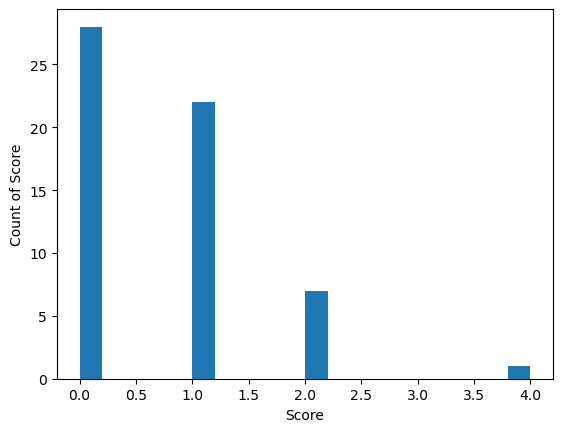

In [96]:
sentences = list(doc.sents) 

scores = [] #list of scores)

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_token: #using tokens
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count,':', sent_str) # prints scores for each sentence as suggested in the question
   
    scores.append(count)  #append scores for each line

print('')
print("List of scores using tokens",scores) #print the list of scores
print('')

#Ploting histogram
from matplotlib import pyplot as plt
import numpy as np

plt.hist(scores, bins=20)

plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

#From the histogram, the most common range of scores seems to be 0

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

0 :       
4 : How Laser Headlights Work                  130 Comments                    by:        Lewin Day                    March 22, 2021                                            
5 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
6 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
8 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
9 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
3 : Now, a new technology is on the scene, with lasers!
1 : Laser Headlights?!
5 : BWM’s prototype laser headlight assemblies undergoing testing.
8 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front o

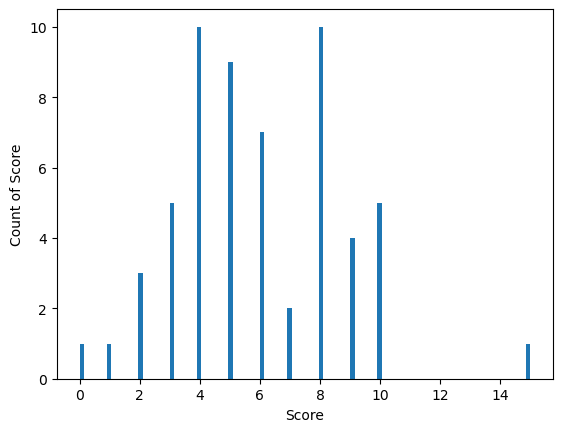

In [98]:
sentences = list(doc.sents)

scores = [] #list of scores)

for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas: #using lemmas
            count += 1
    
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count,':', sent_str) # prints scores for each sentence as suggested in the question
    scores.append(count)  #append scores for each line

print('')
print("List of scores using Lemmas",scores) #print the list of scores

#Ploting histogram
from matplotlib import pyplot as plt
import numpy as np

plt.hist(scores, bins=100)

plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

#From the histogram, the most common range of scores seems to be 10. If we were to seek a range, it is 10-14

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

All the tokens and lexems from Question 3 and 4 seem to be nouns
I could find two ways to consider nouns. Code is provided in the below cell



In [94]:
#Method 1: Copy code from question 4 and add token.pos_=="NOUN"
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token) and token.pos_=="NOUN"]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))
print('')

#Method 2: 
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

doc = nlp(article_content.get_text())

for chunk in doc.noun_chunks:
    print(chunk.text)

lemma_freq=Counter(chunk.text)



[('laser', 34), ('headlight', 25), ('beam', 12), ('led', 11), ('technology', 10)]

How Laser Headlights Work
130 Comments
we
the onward march
automotive technology
headlights
the first thing
that
mind
Engines
fuel efficiency
the switch
electric power
more front
mind
that
thousands
engineers
the world
the state
the art
automotive lighting day
day
Sealed beam headlights
way
more modern designs
once regulations
bulbs
simple halogens
xenon HIDs
a new technology
the scene
lasers
Laser Headlights
BWM’s prototype laser headlight assemblies
testing
The first image
mind
the phrase
“laser headlights
that
laser beams
the front
an automobile
coherent beams
monochromatic light
poor illumination
a very specific spot
our eyes
laser headlights
this way
laser headlights
one or more solid state laser diodes
the headlight
These blue lasers
a yellow phosphor
that
white LEDs
This
a powerful, vibrant white light
that
reflectors
the headlights
the road
Laser headlights
this way
several benefits
They
LEDs
tha